#Data Preprocessing

## Data importation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import numpy as np

from collections import Counter

In [ ]:
# Directory path to WAV files
directory_path = '/content/drive/MyDrive/CS345/TakeHome/wav_data'

In [ ]:
# Function to preprocess and extract spectrogram from wav files
def preprocess(file_path):
    # Load the audio file as a mono waveform
    wav, sample_rate = librosa.load(file_path, sr=22050, mono=True)

    # Normalize the audio
    wav = librosa.util.normalize(wav)

    # Data augmentation: Add noise
    noise_amp = 0.005 * np.random.uniform() * np.amax(wav)
    wav_noise = wav + noise_amp * np.random.normal(size=wav.shape)

    # Ensure the audio is at least 3 seconds (48,000 samples)
    if len(wav) < 48000:
        wav = np.pad(wav, (0, 48000 - len(wav)), mode='constant')
    else:
        wav = wav[:48000]

    # Compute the Short-Time Fourier Transform (STFT)
    spectrogram = librosa.stft(wav, n_fft=4096, hop_length=512)
    spectrogram = np.abs(spectrogram)

    # Expand dimensions to match the expected input shape for TensorFlow models
    spectrogram = np.expand_dims(spectrogram, axis=2)

    return spectrogram

# Function to determine labels based on file name
def get_label_from_filename(file_name):
    if file_name.startswith('ea'):
        return 'Eairh'
    elif file_name.startswith('e'):
        return 'Eh'
    elif file_name.startswith('h'):
        return 'Heh'
    elif file_name.startswith('n'):
        return 'Neh'
    elif file_name.startswith('o'):
        return 'Owh'
    else:
        return 'Unknown'  # Handle case where none of the conditions match

In [ ]:
# Lists to hold features and labels
features = []
labels = []

# Iterate through each sound file, extract the features, and assign labels
for file_name in os.listdir(directory_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory_path, file_name)
        label = get_label_from_filename(file_name)

        # Extract spectrogram and append feature and label
        spectrogram = preprocess(file_path)
        features.append(spectrogram)
        labels.append(label)

# Convert lists to NumPy arrays
features_array = np.array(features)
labels_array = np.array(labels)

# Print shapes to verify
print(f"Features shape: {features_array.shape}")
print(f"labels shape: {labels_array.shape}")

Features shape: (251, 2049, 94, 1)
labels shape: (251,)


## Data Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print("Features shape:", features_array.shape)
print("Labels shape:", labels_array.shape)

Features shape: (251, 2049, 94, 1)
Labels shape: (251,)


In [ ]:
# Display the count of each label
label_counts = Counter(labels_array)
print("Label distribution:", label_counts)

Label distribution: Counter({'Owh': 71, 'Neh': 69, 'Heh': 47, 'Eairh': 38, 'Eh': 26})


In [ ]:
unique_values_features_array = np.unique(features_array[:, 0, 0])  # Unique values in the first feature across all samples
print("Unique values in the first features_array across all samples:", unique_values_features_array)

Unique values in the first features_array across all samples: [1.39823125e-03 2.63886759e-03 2.75641563e-03 4.18956624e-03
 4.76050191e-03 5.32956794e-03 6.91875629e-03 7.61250220e-03
 9.02148429e-03 1.02759041e-02 1.06317736e-02 1.16033116e-02
 1.25591774e-02 1.25794420e-02 1.28723867e-02 1.47174355e-02
 1.47753954e-02 1.65798441e-02 1.79876536e-02 1.83475483e-02
 1.87525898e-02 2.00598910e-02 2.04993058e-02 2.18739863e-02
 2.24993341e-02 2.28886195e-02 2.36161333e-02 2.40000729e-02
 2.47117113e-02 2.52549443e-02 2.58884039e-02 2.66256351e-02
 2.84516625e-02 2.91288719e-02 2.96112709e-02 3.03306896e-02
 3.07282060e-02 3.16736996e-02 3.23060453e-02 3.34301405e-02
 3.44788395e-02 3.51043679e-02 3.60499769e-02 3.89972478e-02
 3.96657549e-02 4.24718335e-02 4.34790254e-02 4.65562344e-02
 4.71754707e-02 4.83543910e-02 5.01131900e-02 5.18172346e-02
 5.27254641e-02 5.41503318e-02 5.43265976e-02 5.43444455e-02
 5.46122491e-02 5.49965389e-02 5.50898276e-02 5.66787533e-02
 5.67558296e-02 5.68089

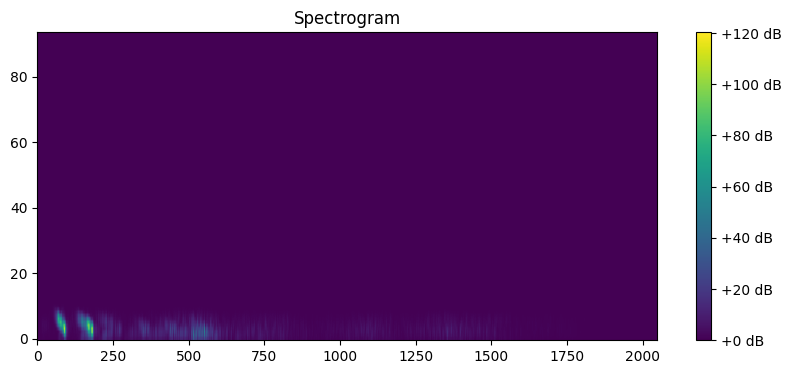

In [ ]:
# Transpose the first spectrogram to (height, width) for visualization
spectrogram = features_array[0, :, :, 0].T

plt.figure(figsize=(10, 4))
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [ ]:
labels_array

array(['Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh',
       'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh', 'Eh',
       'Eh', 'Eh', 'Eh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh',
       'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh',
       'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh',
       'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh',
       'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eh', 'Eairh',
       'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Eairh', 'Heh', 'Heh', 'Heh',
       'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh',
       'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh',
       'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh',
       'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Heh',
       'Heh', 'Heh', 'Heh', 'Heh', 'Heh', 'Eairh', 'Heh', 'Heh', 'Neh',
       'Neh', 'Neh', 'Neh', 'Neh', 'Neh', 'Neh', 'Neh', 'Neh', 'Neh',
       'Neh'

## Data Augmentation

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels_array)

In [ ]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

#Model Creation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# Define a function to create the model
def create_base_model():
    model = Sequential()
    # Input layer
    model.add(Input(shape=(2049, 94, 1)))
    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), activation='relu'))
    # First Max Pooling Layer
    model.add(MaxPooling2D((2, 2)))
    # Second Convolutional Layer
    model.add(Conv2D(16, (3, 3), activation='relu'))
    # Flattening Layer
    model.add(Flatten())
    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    # Dropout Layer
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(5, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#Train and Evaluate Model

In [ ]:
# Define the number of folds for cross-validation
n_folds = 5

# Initialize StratifiedKFold with the desired number of folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

# Initialize lists to store evaluation scores
cv_accuracy_scores_base_model = []
cv_f1_scores_base_model = []
class_precision_scores_base_model = {i: [] for i in range(5)}  # Assuming classes are 0-4
class_recall_scores_base_model = {i: [] for i in range(5)}
class_f1_scores_base_model = {i: [] for i in range(5)}

# Iterate over each fold
for train_index, test_index in skf.split(features_array, y_encoded):
    X_train, X_test = features_array[train_index], features_array[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create a new base model instance for each fold
    base_model = create_base_model()

    # Train the base model on the training data for this fold
    base_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate the base model on the testing data for this fold
    y_pred = base_model.predict(X_test, batch_size=32, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    cv_accuracy_scores_base_model.append(accuracy)

    # Compute precision, recall, and F1 score for each class
    for cls in range(5):
        precision = precision_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)
        recall = recall_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)
        f1 = f1_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)

        class_precision_scores_base_model[cls].append(precision)
        class_recall_scores_base_model[cls].append(recall)
        class_f1_scores_base_model[cls].append(f1)

    # Compute overall F1 score
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    cv_f1_scores_base_model.append(f1)

In [ ]:
# Calculate and print the average scores across all folds
average_accuracy_score_base_model = np.mean(cv_accuracy_scores_base_model)
average_f1_score_base_model = np.mean(cv_f1_scores_base_model)
average_class_precision_scores_base_model = {cls: np.mean(scores) for cls, scores in class_precision_scores_base_model.items()}
average_class_recall_scores_base_model = {cls: np.mean(scores) for cls, scores in class_recall_scores_base_model.items()}
average_class_f1_scores_base_model = {cls: np.mean(scores) for cls, scores in class_f1_scores_base_model.items()}

print("List of Cross-Validation Accuracy of base model:", cv_accuracy_scores_base_model)
print("List of Cross-Validation F1 Score of base model:", cv_f1_scores_base_model)
print()
print("Average Cross-Validation Accuracy of base model:", average_accuracy_score_base_model)
print("Average Cross-Validation F1 Score of base model:", average_f1_score_base_model)
print()
for cls in range(5):
    print(f"Class {cls} of base model Precision: {average_class_precision_scores_base_model[cls]}")
    print(f"Class {cls} of base model Recall: {average_class_recall_scores_base_model[cls]}")
    print(f"Class {cls} of base model F1 Score: {average_class_f1_scores_base_model[cls]}")
    print()

List of Cross-Validation Accuracy of base model: [0.7058823529411765, 0.52, 0.4, 0.68, 0.64]
List of Cross-Validation F1 Score of base model: [0.6767929166729766, 0.48467171717171725, 0.4219335866717748, 0.6507167832167834, 0.6148888888888888]

Average Cross-Validation Accuracy of base model: 0.5891764705882354
Average Cross-Validation F1 Score of base model: 0.5698007785244281

Class 0 of base model Precision: 0.36389610389610394
Class 0 of base model Recall: 0.23928571428571427
Class 0 of base model F1 Score: 0.2742882848146006

Class 1 of base model Precision: 0.27
Class 1 of base model Recall: 0.22000000000000003
Class 1 of base model F1 Score: 0.24242424242424243

Class 2 of base model Precision: 0.7243956043956044
Class 2 of base model Recall: 0.6177777777777778
Class 2 of base model F1 Score: 0.6300532076619033

Class 3 of base model Precision: 0.6489035087719298
Class 3 of base model Recall: 0.6835164835164835
Class 3 of base model F1 Score: 0.6536244115704386

Class 4 of base 

## Experiment 1

In [ ]:
# Define a function to create the model
def create_model_ex1():
    model = Sequential()
    # Input layer
    model.add(Input(shape=(2049, 94, 1)))
    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), activation='relu'))
    # First Max Pooling Layer
    model.add(MaxPooling2D((2, 2)))
    # Second Convolutional Layer
    model.add(Conv2D(16, (3, 3), activation='relu'))
    # Flattening Layer
    model.add(Flatten())
    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    # Dropout Layer
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(5, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Define the number of folds for cross-validation
n_folds = 5

# Initialize StratifiedKFold with the desired number of folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

# Initialize lists to store evaluation scores
cv_accuracy_scores_ex1 = []
cv_f1_scores_ex1 = []
class_precision_scores_ex1 = {i: [] for i in range(5)}  # Assuming classes are 0-4
class_recall_scores_ex1 = {i: [] for i in range(5)}
class_f1_scores_ex1 = {i: [] for i in range(5)}

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Iterate over each fold
fold_number = 0
for train_index, test_index in skf.split(features_array, y_encoded):
    fold_number += 1
    X_train, X_test = features_array[train_index], features_array[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Reshape data for CNN input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

    # Create a new model instance for each fold
    model_ex1 = create_model_ex1()

    # Define the callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(f'best_model_ex1_fold_{fold_number}.keras', monitor='val_loss', save_best_only=True)
    ]

    # Train the model on the training data for this fold
    model_ex1.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2, class_weight=class_weights, callbacks=callbacks)

    # Evaluate the model on the testing data for this fold
    y_pred = model_ex1.predict(X_test, batch_size=32, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)

    # Compute precision, recall, and F1 score for each class
    for cls in range(5):
        precision = precision_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)
        recall = recall_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)
        f1 = f1_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)

        class_precision_scores_ex1[cls].append(precision)
        class_recall_scores_ex1[cls].append(recall)
        class_f1_scores_ex1[cls].append(f1)

    # Compute overall F1 score
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    # Append scores
    cv_accuracy_scores_ex1.append(accuracy)
    cv_f1_scores_ex1.append(f1)

In [ ]:
# Calculate and print the average scores across all folds
average_accuracy_score_ex1 = np.mean(cv_accuracy_scores_ex1)
average_f1_score_ex1 = np.mean(cv_f1_scores_ex1)
average_class_precision_scores_ex1 = {cls: np.mean(scores) for cls, scores in class_precision_scores_ex1.items()}
average_class_recall_scores_ex1 = {cls: np.mean(scores) for cls, scores in class_recall_scores_ex1.items()}
average_class_f1_scores_ex1 = {cls: np.mean(scores) for cls, scores in class_f1_scores_ex1.items()}

print("List of Cross-Validation Accuracy of ex1 model:", cv_accuracy_scores_ex1)
print("List of Cross-Validation F1 Score of ex1 model:", cv_f1_scores_ex1)
print()
print("Average Cross-Validation Accuracy of ex1 model:", average_accuracy_score_ex1)
print("Average Cross-Validation F1 Score of ex1 model:", average_f1_score_ex1)
print()
for cls in range(5):
    print(f"Class {cls} of ex1 model Precision: {average_class_precision_scores_ex1[cls]}")
    print(f"Class {cls} of ex1 model Recall: {average_class_recall_scores_ex1[cls]}")
    print(f"Class {cls} of ex1 model F1 Score: {average_class_f1_scores_ex1[cls]}")
    print()

List of Cross-Validation Accuracy of ex1 model: [0.49019607843137253, 0.5, 0.44, 0.56, 0.52]
List of Cross-Validation F1 Score of ex1 model: [0.48750831710983517, 0.4806657669815565, 0.44002339181286554, 0.5470213903743315, 0.4822222222222222]

Average Cross-Validation Accuracy of ex1 model: 0.5020392156862745
Average Cross-Validation F1 Score of ex1 model: 0.48748821770016215

Class 0 of ex1 model Precision: 0.28888888888888886
Class 0 of ex1 model Recall: 0.3464285714285714
Class 0 of ex1 model F1 Score: 0.30126050420168066

Class 1 of ex1 model Precision: 0.22285714285714286
Class 1 of ex1 model Recall: 0.2666666666666667
Class 1 of ex1 model F1 Score: 0.2247740563530037

Class 2 of ex1 model Precision: 0.6698989898989899
Class 2 of ex1 model Recall: 0.7511111111111111
Class 2 of ex1 model F1 Score: 0.7020350877192982

Class 3 of ex1 model Precision: 0.5202874902874902
Class 3 of ex1 model Recall: 0.6087912087912088
Class 3 of ex1 model F1 Score: 0.5371030403288468

Class 4 of ex1 m

## Experiment 2

In [ ]:
# Define a function to create the CNN-RNN model
def create_model_ex2():
    model = Sequential()
    # Input layer
    model.add(Input(shape=(2049, 94, 1)))
    # Convolutional Block 1
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Convolutional Block 2
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Convolutional Block 3
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    # Flatten the output of the CNN
    model.add(Flatten())
    # Reshape to fit into RNN
    model.add(tf.keras.layers.Reshape((-1, 32)))
    # RNN Layer 1
    model.add(LSTM(64, return_sequences=True))
    # RNN Layer 2
    model.add(LSTM(64))
    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    # Output Layer
    model.add(Dense(5, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Define the number of folds for cross-validation
n_folds = 5

# Initialize StratifiedKFold with the desired number of folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

# Initialize lists to store evaluation scores
cv_accuracy_scores_ex2 = []
cv_f1_scores_ex2 = []
class_precision_scores_ex2 = {i: [] for i in range(5)}  # Assuming classes are 0-4
class_recall_scores_ex2 = {i: [] for i in range(5)}
class_f1_scores_ex2 = {i: [] for i in range(5)}

# Iterate over each fold
for train_index, test_index in skf.split(features_array, y_encoded):
    X_train, X_test = features_array[train_index], features_array[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Create a new base model instance for each fold
    model_ex2 = create_model_ex2()

    # Train the base model on the training data for this fold
    model_ex2.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate the base model on the testing data for this fold
    y_pred = model_ex2.predict(X_test, batch_size=32, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred_classes)
    cv_accuracy_scores_ex2.append(accuracy)

    # Compute precision, recall, and F1 score for each class
    for cls in range(5):
        precision = precision_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)[0]
        recall = recall_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)[0]
        f1 = f1_score(y_test, y_pred_classes, labels=[cls], average=None, zero_division=0)[0]

        class_precision_scores_ex2[cls].append(precision)
        class_recall_scores_ex2[cls].append(recall)
        class_f1_scores_ex2[cls].append(f1)

    # Compute overall F1 score
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    cv_f1_scores_ex2.append(f1)

In [ ]:
# Calculate and print the average scores across all folds
average_accuracy_score_ex2 = np.mean(cv_accuracy_scores_ex2)
average_f1_score_ex2 = np.mean(cv_f1_scores_ex2)
average_class_precision_scores_ex2 = {cls: np.mean(scores) for cls, scores in class_precision_scores_ex2.items()}
average_class_recall_scores_ex2 = {cls: np.mean(scores) for cls, scores in class_recall_scores_ex2.items()}
average_class_f1_scores_ex2 = {cls: np.mean(scores) for cls, scores in class_f1_scores_ex2.items()}

print("List of Cross-Validation Accuracy of base model:", cv_accuracy_scores_ex2)
print("List of Cross-Validation F1 Score of base model:", cv_f1_scores_ex2)
print()
print("Average Cross-Validation Accuracy of base model:", average_accuracy_score_ex2)
print("Average Cross-Validation F1 Score of base model:", average_f1_score_ex2)
print()
for cls in range(5):
    print(f"Class {cls} of base model Precision: {average_class_precision_scores_ex2[cls]}")
    print(f"Class {cls} of base model Recall: {average_class_recall_scores_ex2[cls]}")
    print(f"Class {cls} of base model F1 Score: {average_class_f1_scores_ex2[cls]}")
    print()

List of Cross-Validation Accuracy of base model: [0.43137254901960786, 0.4, 0.4, 0.32, 0.36]
List of Cross-Validation F1 Score of base model: [0.3623476417594065, 0.34489868188077905, 0.37006410256410255, 0.19747593582887701, 0.21765182186234816]

Average Cross-Validation Accuracy of base model: 0.38227450980392164
Average Cross-Validation F1 Score of base model: 0.2984876367791026

Class 0 of base model Precision: 0.42222222222222217
Class 0 of base model Recall: 0.425
Class 0 of base model F1 Score: 0.39768833849329205

Class 1 of base model Precision: 0.0
Class 1 of base model Recall: 0.0
Class 1 of base model F1 Score: 0.0

Class 2 of base model Precision: 0.27904761904761904
Class 2 of base model Recall: 0.2511111111111111
Class 2 of base model F1 Score: 0.24853846153846154

Class 3 of base model Precision: 0.2630952380952381
Class 3 of base model Recall: 0.42637362637362636
Class 3 of base model F1 Score: 0.3189189189189189

Class 4 of base model Precision: 0.3270278134360291
Cla